In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
IS_SAMPLE_ANALYSIS = True
TARGET = 'google'
if IS_SAMPLE_ANALYSIS:
    TARGET = 'sample_' + TARGET

In [3]:
cols = ['text','timestamp','user','tweet_source','tweet_id','user_location','source_device']
tweets = pd.read_csv('../data/google_sample.csv', names=cols)

In [4]:
tweets.head()

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device
0,What is going on with this google search fam 😭...,1.584532e+09,_NjokiNgethe,1239972868848406531,1240244950018723841,"Nairobi, U.S of AFRICA. 🇰🇪",Twitter for Android
1,so jisung and google had a bonding moment over...,1.582143e+09,euphoriajeongin,1230210625831342082,1230221687838343171,loving stray kids and bts,Twitter for iPhone
2,Most Tweeted contestant Sidharth\n\nMost Trend...,1.582124e+09,Nita84831447,1230141046807552000,1230142053717282817,NaN,Twitter for Android
3,This really fcking hurts. Someone got into Eti...,1.582118e+09,bowzah103,1229995795568566272,1230118798226837504,dunno really,Twitter for Android
4,help bh made a whole website w the google map ...,1.582269e+09,jeonschu,1230742466598277122,1230749414123114496,NaN,Twitter for iPhone


### Tweet distribution over time

In [5]:
dates = pd.DataFrame(tweets['timestamp']/1000)

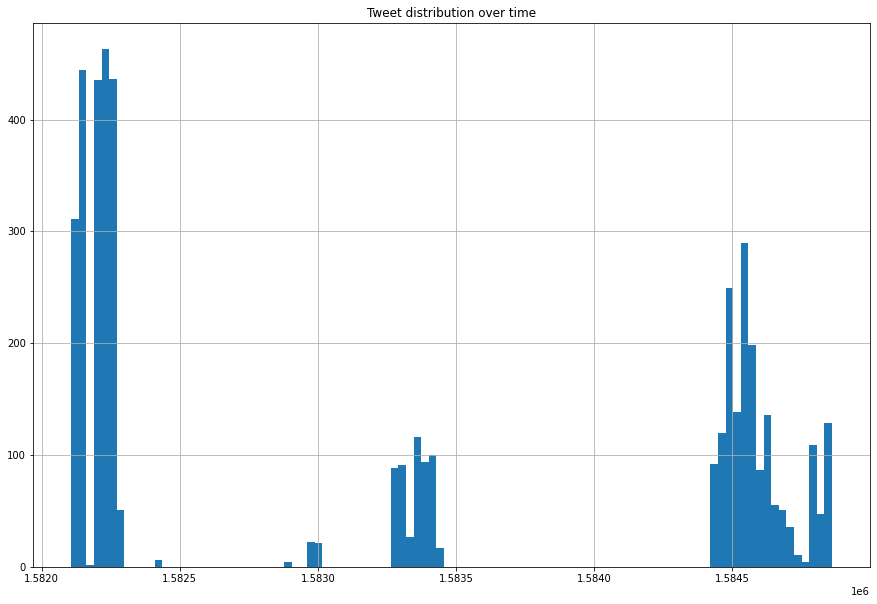

In [6]:
dates.hist(bins=100, figsize=(15,10))
plt.title('Tweet distribution over time')
plt.show()

### Cleaning
- Remove
    - All urls
    - '#' form infront of hashtags
    - mentions
    - emojis
    - Non ASCII chanracters

In [7]:
import re
import preprocessor as p

# Don't remove hastags
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.NUMBER, p.OPT.SMILEY, p.OPT.RESERVED, p.OPT.MENTION)

NOT_BASIC_LATIN_PATTERN = re.compile(u'[^\u0000-\u007F]')
PUNCTUATIONS_PATTERN = re.compile(r'[\#\$\%\&\(\)\*\+\-\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]')
MULTIPLE_SPACES_PATTERN = re.compile(r' +')

def clean_text(text):
    text = text.lower()
    text = p.clean(text) # Clean using tweet-preprocessor except hashtags
    text = NOT_BASIC_LATIN_PATTERN.sub(' ', text) # Remove everything except basic latin
    text = re.sub(r'&amp;', 'and', text)
    text = PUNCTUATIONS_PATTERN.sub(' ', text) # Remove all punctuations
    text = MULTIPLE_SPACES_PATTERN.sub(' ', text) # Remove multiple consequent spaces
    return text.strip()

In [8]:
tweets['clean_text'] = tweets['text'].apply(lambda x: clean_text(x))
tweets.head()

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device,clean_text
0,What is going on with this google search fam 😭...,1.584532e+09,_NjokiNgethe,1239972868848406531,1240244950018723841,"Nairobi, U.S of AFRICA. 🇰🇪",Twitter for Android,what is going on with this google search fam
1,so jisung and google had a bonding moment over...,1.582143e+09,euphoriajeongin,1230210625831342082,1230221687838343171,loving stray kids and bts,Twitter for iPhone,so jisung and google had a bonding moment over...
2,Most Tweeted contestant Sidharth\n\nMost Trend...,1.582124e+09,Nita84831447,1230141046807552000,1230142053717282817,NaN,Twitter for Android,most tweeted contestant sidharth most trended ...
3,This really fcking hurts. Someone got into Eti...,1.582118e+09,bowzah103,1229995795568566272,1230118798226837504,dunno really,Twitter for Android,this really fcking hurts. someone got into eti...
4,help bh made a whole website w the google map ...,1.582269e+09,jeonschu,1230742466598277122,1230749414123114496,NaN,Twitter for iPhone,help bh made a whole website w the google map ...


### Analysis of words used in cleaned tweets

#### Most used words

In [9]:
import nltk
from nltk.text import Text
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt

tokenizer = TweetTokenizer()

all_clean_text = []
for text in tweets['clean_text']:
    for t in tokenizer.tokenize(text):
        all_clean_text.append(t)
all_clean_text = Text(all_clean_text)

In [10]:
freq_dist = nltk.FreqDist(all_clean_text)

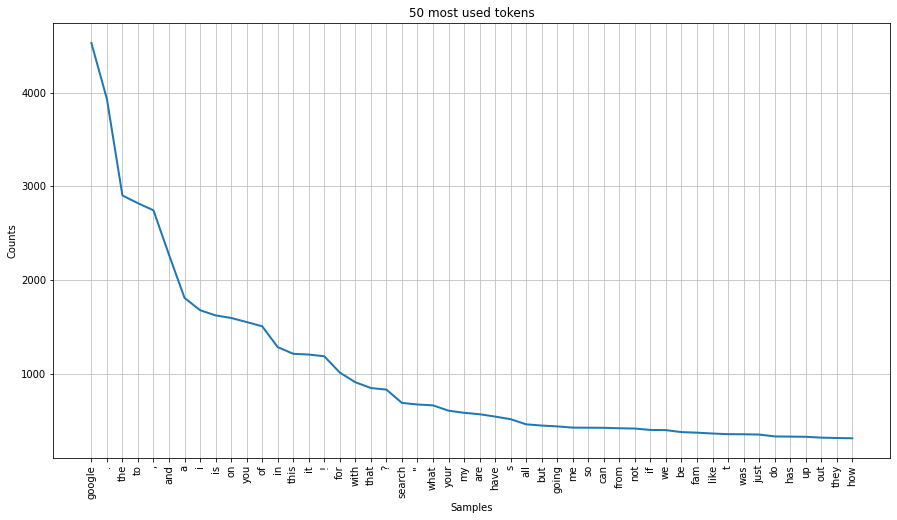

In [11]:
plt.figure(figsize=(15,8))
freq_dist.plot(50, title="50 most used tokens")

#### Most used words after removing stop words and punctuations

In [12]:
# nltk.download('stopwords')

from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

# Add 'google' and 'search' in stop words
stop_words.add('google')
stop_words.add('search')
# Remove stopwords
freq_dist = nltk.FreqDist(dict((word, freq) for word, freq in freq_dist.items() if word not in stop_words and word.isalpha()))

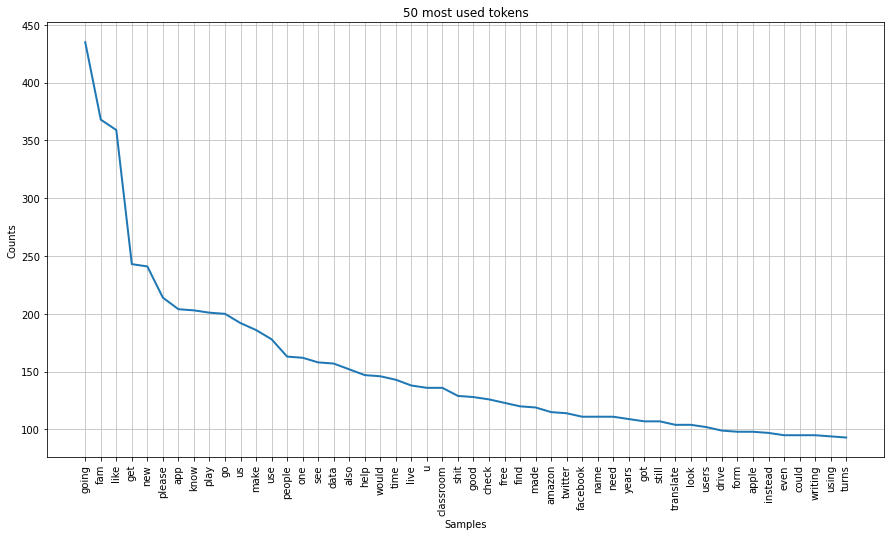

In [13]:
plt.figure(figsize=(15,8))
freq_dist.plot(50, title="50 most used tokens")

### Feature Creation

#### 'is_retweet' from 'tweet_source' and 'tweet_id'

In [14]:
def is_retweet(x):
    return x[0] != x[1]

In [15]:
tweets['is_retweet'] = tweets[['tweet_source','tweet_id']].apply(lambda x: is_retweet(x), axis=1)

In [16]:
tweets.head()

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device,clean_text,is_retweet
0,What is going on with this google search fam 😭...,1.584532e+09,_NjokiNgethe,1239972868848406531,1240244950018723841,"Nairobi, U.S of AFRICA. 🇰🇪",Twitter for Android,what is going on with this google search fam,True
1,so jisung and google had a bonding moment over...,1.582143e+09,euphoriajeongin,1230210625831342082,1230221687838343171,loving stray kids and bts,Twitter for iPhone,so jisung and google had a bonding moment over...,True
2,Most Tweeted contestant Sidharth\n\nMost Trend...,1.582124e+09,Nita84831447,1230141046807552000,1230142053717282817,NaN,Twitter for Android,most tweeted contestant sidharth most trended ...,True
3,This really fcking hurts. Someone got into Eti...,1.582118e+09,bowzah103,1229995795568566272,1230118798226837504,dunno really,Twitter for Android,this really fcking hurts. someone got into eti...,True
4,help bh made a whole website w the google map ...,1.582269e+09,jeonschu,1230742466598277122,1230749414123114496,NaN,Twitter for iPhone,help bh made a whole website w the google map ...,True


#### 'hashtags' from 'text'

In [40]:
HASHTAG_PATTERN = re.compile(r'#\w*')
def get_hashtags(text):
    return ' '.join(HASHTAG_PATTERN.findall(text))

In [41]:
tweets['hashtags'] = tweets['text'].apply(lambda x: get_hashtags(x))

In [43]:
tweets.head()

,text,timestamp,user,tweet_source,tweet_id,user_location,source_device,clean_text,is_retweet,hashtags
0,What is going on with this google search fam 😭...,1.584532e+09,_NjokiNgethe,1239972868848406531,1240244950018723841,"Nairobi, U.S of AFRICA. 🇰🇪",Twitter for Android,what is going on with this google search fam,True,
1,so jisung and google had a bonding moment over...,1.582143e+09,euphoriajeongin,1230210625831342082,1230221687838343171,loving stray kids and bts,Twitter for iPhone,so jisung and google had a bonding moment over...,True,
2,Most Tweeted contestant Sidharth\n\nMost Trend...,1.582124e+09,Nita84831447,1230141046807552000,1230142053717282817,NaN,Twitter for Android,most tweeted contestant sidharth most trended ...,True,#SidharthShuklaFever
3,This really fcking hurts. Someone got into Eti...,1.582118e+09,bowzah103,1229995795568566272,1230118798226837504,dunno really,Twitter for Android,this really fcking hurts. someone got into eti...,True,
4,help bh made a whole website w the google map ...,1.582269e+09,jeonschu,1230742466598277122,1230749414123114496,NaN,Twitter for iPhone,help bh made a whole website w the google map ...,True,#BTSxGRANDCENTRAL
